In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy
import seaborn as sns

In [2]:
unemployment = pd.read_excel("unemployment_rate.xls")
inflation = pd.read_excel("inflation_rate.xls")
gdp_growth = pd.read_excel("real_gdp_growth_rate.xls")
real_output = pd.read_excel("real_output.xls")

In [3]:
unemployment = unemployment[(unemployment['Year'] >= 1982) & (unemployment['Year'] <= 2022)]
unemployment = unemployment.reset_index(drop = True)

In [4]:
inflation = inflation[(inflation['Year'] >= 1982) & (inflation['Year'] <= 2022)]
inflation = inflation.reset_index(drop = True)

In [5]:
gdp_growth = gdp_growth[(gdp_growth['Year'] >= 1982) & (gdp_growth['Year'] <= 2022)]
gdp_growth = gdp_growth.reset_index(drop = True)

In [6]:
real_output = real_output[(real_output['Year'] >= 1982) & (real_output['Year'] <= 2022)]
real_output = real_output.reset_index(drop = True)

In [7]:
data = pd.merge(unemployment, inflation , on = 'Year')
data = pd.merge(data, gdp_growth, on = 'Year')
data = pd.merge(data, real_output, on = 'Year')

In [8]:
data.head()

,Year,Pakistan Unemployment rate (Percent),"Pakistan Inflation rate, average consumer prices (Annual percent change)",Pakistan Real GDP growth (Annual percent change),"Pakistan GDP, current prices (Billions of U.S. dollars)"
0,1982,3.8,5.9,7.6,45.026
1,1983,3.9,6.4,6.8,42.038
2,1984,3.8,6.1,4.0,45.639
3,1985,3.6,5.6,8.7,45.634
4,1986,3.3,3.5,6.4,46.734


In [9]:
table = data.to_excel('data_table.xlsx')
#df_cars.to_excel("converted-to-excel.xlsx")

In [10]:
data.columns

Index(['Year', 'Pakistan Unemployment rate (Percent) ',
       'Pakistan Inflation rate, average consumer prices (Annual percent change) ',
       'Pakistan Real GDP growth (Annual percent change)',
       'Pakistan GDP, current prices (Billions of U.S. dollars)'],
      dtype='object')

In [11]:
model = LinearRegression()

In [12]:
unemployment_rate = data.iloc[:, 1].to_list()
inflation_rate = data.iloc[:, 2].to_list()
gdp_growth_rate = data.iloc[:, 3].to_list()
real_gdp = data.iloc[:, 4].to_list()

In [13]:
from scipy.stats import linregress
coeffs_phillips = linregress(real_gdp, inflation_rate)
results_phillips = pd.DataFrame({
    'Variable': ['Slope', 'Intercept', 'R-value', 'P-value', 'Std. Error'],
    'Value': [coeffs_phillips.slope, coeffs_phillips.intercept, coeffs_phillips.rvalue, coeffs_phillips.pvalue, coeffs_phillips.stderr]
})

print(results_phillips)
#table = data.to_excel('data_table.xlsx')
results_phillips.to_excel('Phillips_scores.xlsx')

     Variable     Value
0       Slope  0.003034
1   Intercept  7.477414
2     R-value  0.089429
3     P-value  0.578189
4  Std. Error  0.005412


In [14]:
from scipy.stats import linregress
coeffs_okuns = linregress(gdp_growth_rate, unemployment_rate)
results_okuns = pd.DataFrame({
    'Variable': ['Slope', 'Intercept', 'R-value', 'P-value', 'Std. Error'],
    'Value': [coeffs_okuns.slope, coeffs_okuns.intercept, coeffs_okuns.rvalue, coeffs_okuns.pvalue, coeffs_okuns.stderr]
})

print(results_okuns)
results_okuns.to_excel("Okuns_scores.xlsx")

     Variable     Value
0       Slope -0.172691
1   Intercept  6.412159
2     R-value -0.245786
3     P-value  0.121382
4  Std. Error  0.109056


In [15]:
unemployment_rate = data.iloc[:, 1].values.reshape(-1, 1)
inflation_rate = data.iloc[:, 2].values.reshape(-1,1)
gdp_growth_rate = data.iloc[:, 3].values.reshape(-1,1)
real_gdp = data.iloc[:, 4].values.reshape(-1,1)

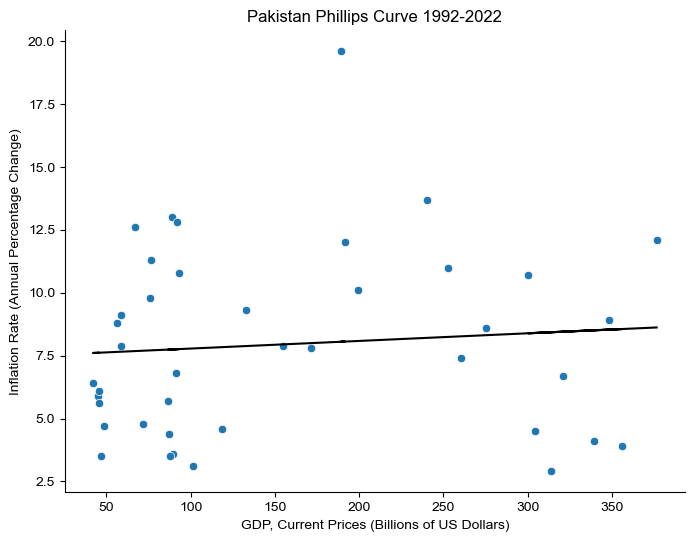

In [16]:
lr = LinearRegression()
plot_inflation_rate = sns.scatterplot(data = data, x = 'Pakistan GDP, current prices (Billions of U.S. dollars)',
                                      y = 'Pakistan Inflation rate, average consumer prices (Annual percent change) ')
plot_inflation_rate.set(title = "Pakistan Phillips Curve 1992-2022", xlabel = 'GDP, Current Prices (Billions of US Dollars)', 
                        ylabel = 'Inflation Rate (Annual Percentage Change)')
lr.fit(real_gdp, inflation_rate)
inflation_pred = lr.predict(real_gdp)
plot_inflation_rate.plot(real_gdp, inflation_pred, color = 'black')
sns.despine()
plot_inflation_rate.figure.set_size_inches(8, 6)
sns.set_style(style = 'white', rc = {"axes.facecolor": "#FAFAFA", 'xtick.bottom': True, 'ytick.left': True})

In [17]:
okuns = model.fit(unemployment_rate, gdp_growth_rate)

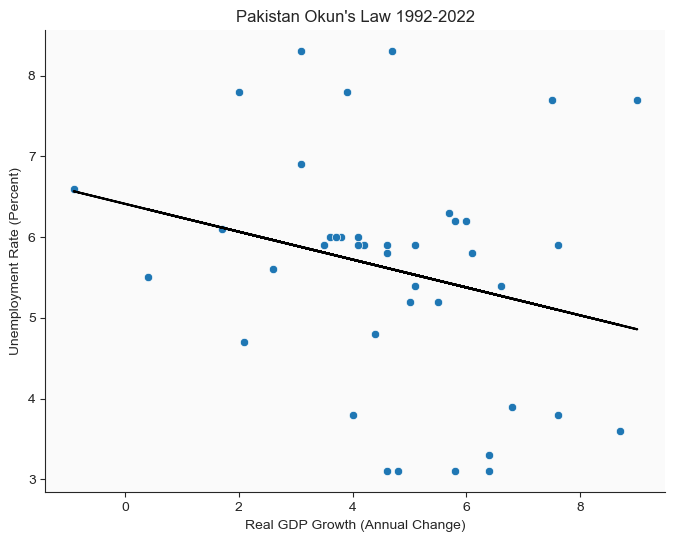

In [18]:
plot_unemployment_rate = sns.scatterplot(data = data, x = 'Pakistan Real GDP growth (Annual percent change)',
                                      y = 'Pakistan Unemployment rate (Percent) ')
plot_unemployment_rate.set(title = "Pakistan Okun's Law 1992-2022", xlabel = 'Real GDP Growth (Annual Change)', 
                           ylabel = 'Unemployment Rate (Percent)')
lr.fit(gdp_growth_rate, unemployment_rate)
unemployment_pred = lr.predict(gdp_growth_rate)
plot_unemployment_rate.plot(gdp_growth_rate, unemployment_pred, color = 'black')
sns.despine()
plot_unemployment_rate.figure.set_size_inches(8, 6)
sns.set_style(style = 'white', rc = {"axes.facecolor": "#FAFAFA", 'xtick.bottom': True, 'ytick.left': True})